In [128]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas

In [129]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv")
# market_data_df.set_index('coin_id',inplace=True)
# Display sample data
market_data_df.head(5)

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [130]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [131]:
market_data_df.columns,

(Index(['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d',
        'price_change_percentage_14d', 'price_change_percentage_30d',
        'price_change_percentage_60d', 'price_change_percentage_200d',
        'price_change_percentage_1y'],
       dtype='object'),)

### Prepare the Data

In [132]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

scaler = StandardScaler()
numeric_data = market_data_df.select_dtypes(include=['float64', 'int64'])
scaled_data = scaler.fit_transform(numeric_data)
scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

scaled_data_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [133]:
# Create a DataFrame with the scaled data

scaled_data_df.set_index(market_data_df['coin_id'], inplace=True)

# Set the coinid column as index
scaled_data_df.head()

# Display sample data


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [134]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data_df)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve
elbow_data = pd.DataFrame({'k': k_values, 'inertia': inertia_values})

# Display the DataFrame
elbow_data

c:\Users\sdalal\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sdalal\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\sdalal\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sdalal\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sdalal\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sdalal\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,66.099188
5,6,52.825023
6,7,43.888539
7,8,37.517032
8,9,32.364427
9,10,28.757846


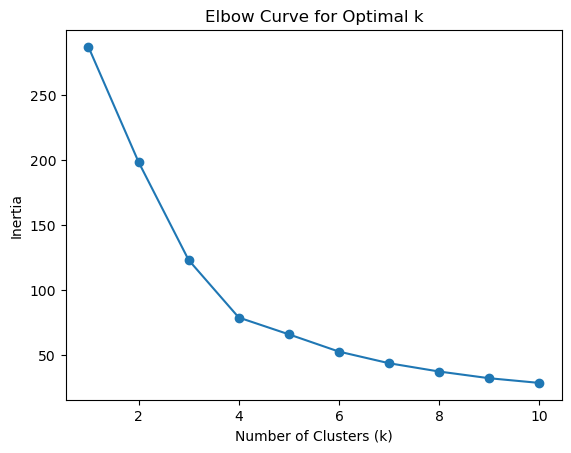

In [135]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_data['k'], elbow_data['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k')
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**
4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [136]:
# Initialize the K-Means model using the best value for k
optimal_k = 3  # Choose the optimal k based on the Elbow curve
kmeans = KMeans(n_clusters=optimal_k)


In [137]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_data_df)

c:\Users\sdalal\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sdalal\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [138]:
# Predict the clusters to group the cryptocurrencies using the scaled data
scaled_data_df['cluster'] = kmeans.labels_

# View the resulting array of cluster values.
print(scaled_data_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [139]:
# Create a copy of the DataFrame


In [140]:
# Add a new column to the DataFrame with the predicted clusters


# Display sample data
print(scaled_data_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

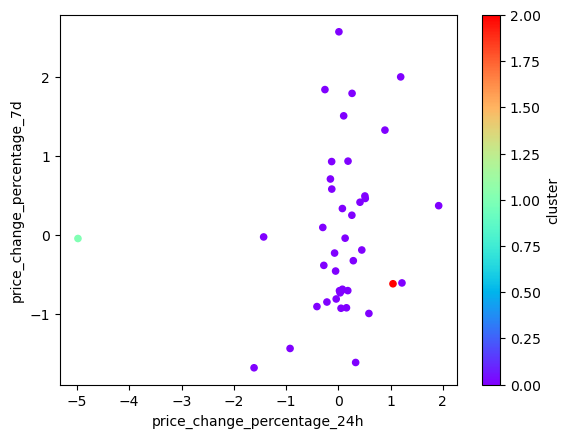

In [141]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scaled_data_df.plot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', c='cluster', colormap='rainbow')
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [142]:
# Create a PCA model instance and set `n_components=3`.


In [143]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.


# View the first five rows of the DataFrame. 
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'], index=market_data_df.index)
print(pca_df.head())

        PC1       PC2       PC3
0 -0.600667  0.842760  0.461595
1 -0.458261  0.458466  0.952877
2 -0.433070 -0.168126 -0.641752
3 -0.471835 -0.222660 -0.479053
4 -1.157800  2.041209  1.859715


In [144]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print('Explained Variance:', explained_variance)

Explained Variance: [0.3719856  0.34700813 0.17603793]


In [145]:
total_explained_variance = sum(explained_variance)
total_explained_variance

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
0.89

In [146]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_data_df.index)

# Copy the crypto names from the original data
#pca_df['crypto_name'] = crypto_names
pca_df = pca_df.rename_axis('coinid')
# Set the coinid column as index
#pca_df.set_index('coinid', inplace=True)

# Display sample data
print(pca_df.head())

                   PC1       PC2       PC3
coinid                                    
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


### Find the Best Value for k Using the PCA Data

In [147]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

# Create a list with the number of k-values to try
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    pca = PCA(n_components=3)
    pca_data = pca.fit_transform(scaled_data_df)
    kmeans.fit(pca_data)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)


c:\Users\sdalal\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sdalal\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sdalal\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sdalal\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans

   k_values  inertia_values
0         1      260.820670
1         2      171.873115
2         3       93.070783
3         4       48.969233
4         5       37.391913
5         6       27.307190
6         7       20.910878
7         8       16.796674
8         9       13.523634
9        10       10.650816


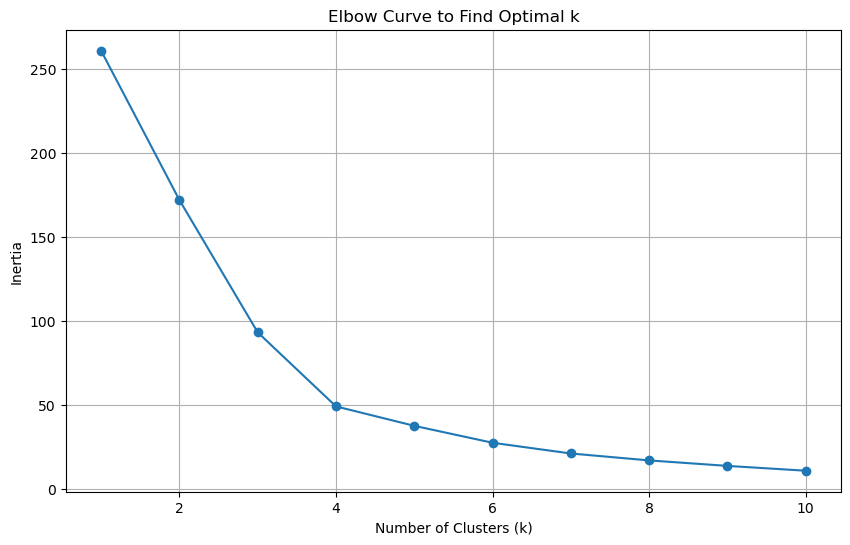

In [148]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve to Find Optimal k')
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 
4

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
  No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [149]:
# Initialize the K-Means model using the best value for k
best_k=4
best_kmeans = KMeans(n_clusters=best_k)

In [150]:
# Fit the K-Means model using the PCA data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data_df)
best_kmeans.fit(pca_data)

c:\Users\sdalal\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sdalal\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [151]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = best_kmeans.predict(pca_data)

# Print the resulting array of cluster values.
print(cluster_labels)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 0 2 2 2 0 2 2 2 1 2 2 0 3
 2 2 2 2]


In [152]:
# Create a copy of the DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

# Add a new column to the DataFrame with the predicted clusters
pca_df['Cluster'] = cluster_labels

# Display sample data
print(pca_df.head())

       PCA1      PCA2  Cluster
0 -0.458737  0.929075        0
1 -0.386833  0.525089        0
2 -0.457751 -0.090974        2
3 -0.504507 -0.137660        2
4 -0.808014  2.202362        0


In [153]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

scatter_plot = pca_df.hvplot.scatter(x="PCA1", y="PCA2", c="Cluster", cmap='Category10', title='PCA Scatter Plot with Clusters')

# Display the scatter plot
scatter_plot

:Scatter   [PCA1]   (PCA2,Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [154]:
# Use the columns from the original scaled DataFrame as the index.
principal_components = pca.components_

# Create a DataFrame to display the weights of each feature on each principal component
weights_df = pd.DataFrame(principal_components, columns=scaled_data_df.columns, index=['PC1', 'PC2'])

# Display the DataFrame showing the weights of each feature on each principal component
print(weights_df)

     price_change_percentage_24h  price_change_percentage_7d  \
PC1                    -0.342978                   -0.066401   
PC2                     0.427118                    0.239598   

     price_change_percentage_14d  price_change_percentage_30d  \
PC1                     0.078695                     0.280073   
PC2                     0.531446                     0.518259   

     price_change_percentage_60d  price_change_percentage_200d  \
PC1                     0.382655                      0.581450   
PC2                     0.368917                     -0.079099   

     price_change_percentage_1y   cluster  
PC1                    0.526382  0.178148  
PC2                   -0.249837  0.066030  


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    

In [155]:
for component in weights_df.index:
    print(f"Principal Component: {component}")
    print("Top 3 features with strongest positive influence:")
    print(weights_df.loc[component].nlargest(3))
    print("\nTop 3 features with strongest negative influence:")
    print(weights_df.loc[component].nsmallest(3))
    print("\n")

Principal Component: PC1
Top 3 features with strongest positive influence:
price_change_percentage_200d    0.581450
price_change_percentage_1y      0.526382
price_change_percentage_60d     0.382655
Name: PC1, dtype: float64

Top 3 features with strongest negative influence:
price_change_percentage_24h   -0.342978
price_change_percentage_7d    -0.066401
price_change_percentage_14d    0.078695
Name: PC1, dtype: float64


Principal Component: PC2
Top 3 features with strongest positive influence:
price_change_percentage_14d    0.531446
price_change_percentage_30d    0.518259
price_change_percentage_24h    0.427118
Name: PC2, dtype: float64

Top 3 features with strongest negative influence:
price_change_percentage_1y     -0.249837
price_change_percentage_200d   -0.079099
cluster                         0.066030
Name: PC2, dtype: float64


